In [2]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import logging
from model.models import Simulator
import service.regressor as regressor
import pickle
import seaborn as sns


import service.files_service as fs
import csv
import datetime

In [2]:
df_t = pd.read_csv('data/merged_no_spread_light.csv',sep=';', parse_dates=['cal_time'])

In [5]:
df_t = df_t.set_index('cal_time')

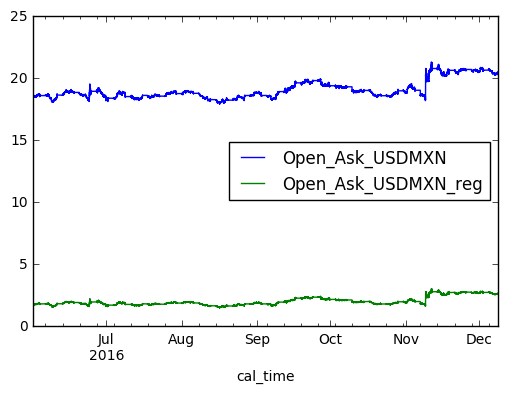

In [25]:
df_t[['Open_Ask_USDMXN', 'Open_Ask_USDMXN_reg']].plot()


In [57]:
simulator = pickle.load(open('data/predictions/simulator_Open_Ask_USDCAD_with_3_shifts.p','rb'))

In [58]:
df_t = simulator.predictions
#df_t=df_t[(df_t.index>'2016-10-24 12:30') & (df_t.index<'2016-10-24 14:00')]
df_t.head()

,observed,predicted
2016-10-24 12:00:00,1.33486,NaN
2016-10-24 12:01:00,1.33466,NaN
2016-10-24 12:02:00,1.33474,NaN
2016-10-24 12:03:00,1.33482,1.334674
2016-10-24 12:04:00,1.33478,1.334679


In [62]:
df_t['observed_shift']=df_t.observed.shift(periods=3)

df_t['pip_O']= (df_t.observed -df_t['observed_shift'])*10000
df_t['pip_P']= (df_t.predicted -df_t['observed_shift'])*10000

df_t['pip_O_10+']=df_t['pip_O'].abs()>10
df_t['pip_P_10+']=df_t['pip_P'].abs()>10
df_t['same_sign']=(df_t['pip_O']*df_t['pip_P'])>0

df_t['true_positive']= df_t['pip_O_10+'] *df_t['pip_P_10+']*df_t['same_sign']
df_t['true_negative']= (df_t['pip_O_10+']==False) *(df_t['pip_P_10+']==False)*df_t['same_sign']

df_t['is_right'] = (df_t['true_positive']) | df_t['true_negative']

In [65]:
df_t[~df_t['is_right']]

,observed,predicted,observed_shift,pip_O,pip_P,pip_O_10+,pip_P_10+,same_sign,true_positive,true_negative,is_right
2016-10-24 12:00:00,1.33486,NaN,NaN,NaN,NaN,False,False,False,False,False,False
2016-10-24 12:01:00,1.33466,NaN,NaN,NaN,NaN,False,False,False,False,False,False
2016-10-24 12:02:00,1.33474,NaN,NaN,NaN,NaN,False,False,False,False,False,False
2016-10-24 12:06:00,1.33483,1.334723,1.33482,0.1,-0.974811,False,False,False,False,False,False
2016-10-24 12:07:00,1.33533,1.334628,1.33478,5.5,-1.518948,False,False,False,False,False,False
2016-10-24 12:08:00,1.33554,1.334668,1.33469,8.5,-0.218405,False,False,False,False,False,False
2016-10-24 12:09:00,1.33549,1.334668,1.33483,6.6,-1.618405,False,False,False,False,False,False
2016-10-24 12:10:00,1.33537,1.334728,1.33533,0.4,-6.017590,False,False,False,False,False,False
2016-10-24 12:13:00,1.33569,1.334725,1.33537,3.2,-6.446201,False,False,False,False,False,False
2016-10-24 12:14:00,1.33570,1.334728,1.33541,2.9,-6.817590,False,False,False,False,False,False


In [68]:
df_t['is_right'].value_counts()

False    1620
True     1290
Name: is_right, dtype: int64

In [94]:
2271.0/(639.0+2271.0)*100.0


78.04123711340206